<a href="https://colab.research.google.com/github/eduardoscovino/Pokemon-analysis/blob/main/Pokemon_Analysis_With_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('drive/MyDrive/Kaggle/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## The variables of the dataset

* `Name:` Name of the pokemon
* `Type 1:` Each pokemon has a type. Ex: Grass, water, fire...
* `Type 2:` A pokemon can also have more than one type
* `Total:` The whole power of the pokemon, which is the sum of its attibutes (the following columns)
* `HP:` Hit points (or health), which is the impact a pokemon can handle before being out of combat
* `Attack:` Power of normal attacks
* `Defense:` Power of resistence against normal attacks
* `Sp. Atk:` Power of the special attack
* `Sp. Def:` Power of resistence against special attacks
* `Speed:` The criteria to define which pokemon attacks first each round
* `Generation:` From which generation is the pokemon
* `Legendary:` A boolean variable to inform if the pokemon is legendary or not

## Data Cleaning

Actually, I rather prefer working with columns written uppercased. So, let's do this now.

In [6]:
df.columns = df.columns.str.upper()
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.loc[df.NAME.str.contains('Mega')].head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


If we look at the pokemons whose name contains 'Mega', we see that the strings before the 'Mega' are unnecessary.

So let's cut the strings before the 'Mega' in our dataset.

In [8]:
df.NAME = df.NAME.str.replace(".*(?=Mega)", "")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Treatment for null values

In [9]:
print(df.isnull().sum().sort_values(ascending=False) / df.shape[0])

TYPE 2        0.4825
#             0.0000
NAME          0.0000
TYPE 1        0.0000
TOTAL         0.0000
HP            0.0000
ATTACK        0.0000
DEFENSE       0.0000
SP. ATK       0.0000
SP. DEF       0.0000
SPEED         0.0000
GENERATION    0.0000
LEGENDARY     0.0000
dtype: float64


It seems only the `TYPE 2` has null values, which makes sense. These are the pokemons that don't have a dual type. In this case, let's replace the null values with "Type 1".

In [10]:
df['TYPE 2'].fillna('Type 1', inplace=True)
df.loc[df['TYPE 2'] == 'Type 1'].head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
4,4,Charmander,Fire,Type 1,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Type 1,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,Type 1,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Type 1,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Type 1,530,79,83,100,85,105,78,1,False


## First impressions of the dataset

In [11]:
print('{} rows'.format(df.shape[0]))
print('{} pokemons'.format(df.NAME.unique().size))

800 rows
800 pokemons


As we've got 1 pokemon per row, it's a good idea to put the column `NAME` as the index of the dataframe. Even more, the column `#` doens't make much sense to the analysis. Let's drop it.

In [12]:
df.set_index('NAME', inplace=True)
df.head()

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Type 1,309,39,52,43,60,50,65,1,False


In [13]:
df=df.drop(['#'],axis=1) # we don't need this column anymore

In the following code, there's the statistical summary, just to see what's going on with the famous metrics, such as mean, quartiles, max and min.

In [14]:
df_summary = df.describe() # basic statistic informations
df_summary

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Visualizations

### Histograms

Let's see how is the distribution of the attibutes using the histogram.

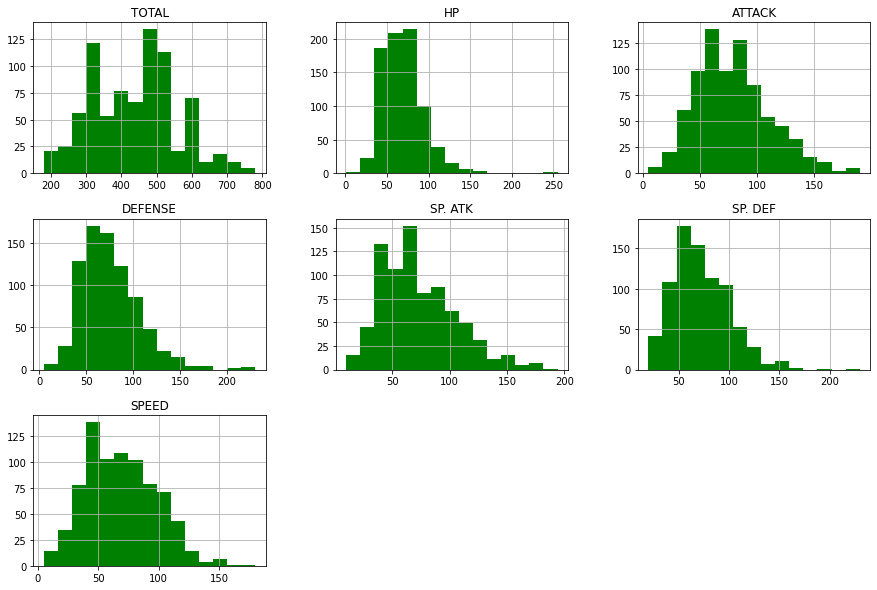

In [17]:
df[[
  'TOTAL',
  'HP',
  'ATTACK',
  'DEFENSE',
  'SP. ATK',
  'SP. DEF',
  'SPEED'
]].hist(bins = 15, figsize =(15, 10), color='green');

Ok, but hey, I may say this result has a bias caused by the presence of legendary pokemons.

It doens't make much sense to talk about outliers in this analysis, but as a legendary pokemon is supposed to be much more powerful than the ordinary ones, it might be cool to compare the histograms with and without the legendary group.

But first, let's see if a legendary pokemon is stronger indeed. We're gonna query the strong ones by type.

But how?

My idea is to find which types have at least one legendary pokemon and see in these types who are the top pokemons.

In [32]:
legendary_in_type = df.loc[df.LEGENDARY == True]['TYPE 1'].unique() # create a list of types which have at least one legendary pokemon

df_legendary = df.loc[df['TYPE 1'].isin(legendary_in_type)] # now we are only looking for these types

df_top_pokemons = df_legendary.sort_values('TOTAL', ascending=False).drop_duplicates('TYPE 1')
print(df_top_pokemons[['TYPE 1', 'TOTAL', 'LEGENDARY']])
print('\n')
print(df_top_pokemons.LEGENDARY.value_counts() / df_top_pokemons.shape[0]) # percentage of legendary vs ordinary

                         TYPE 1  TOTAL  LEGENDARY
NAME                                             
Mega Mewtwo Y           Psychic    780       True
Mega Rayquaza            Dragon    780       True
KyogrePrimal Kyogre       Water    770       True
GroudonPrimal Groudon    Ground    770       True
Arceus                   Normal    720       True
Mega Diancie               Rock    700       True
Mega Metagross            Steel    700      False
GiratinaAltered Forme     Ghost    680       True
Ho-oh                      Fire    680       True
Xerneas                   Fairy    680       True
Yveltal                    Dark    680       True
Mega Sceptile             Grass    630      False
Mega Ampharos          Electric    610      False
Regice                      Ice    580       True
TornadusTherian Forme    Flying    580       True


True     0.8
False    0.2
Name: LEGENDARY, dtype: float64


Good. Now I'm more confident that the presence of legendary pokemons can put a bias on our histograms. Back to the plots, let's exclude the legendary pokemons and then compare the histograms.

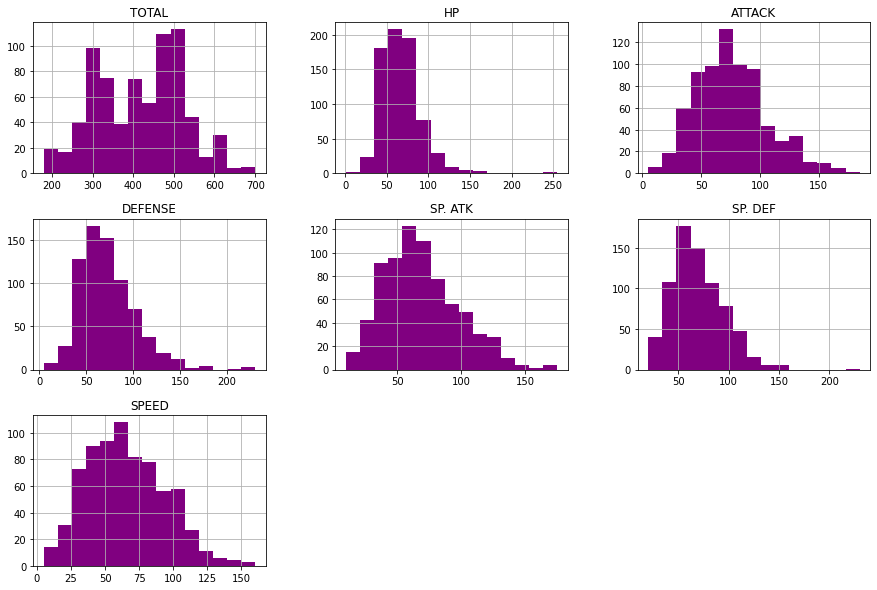

In [33]:
df_ordinary = df.loc[df.LEGENDARY == False]

df_ordinary[[
  'TOTAL',
  'HP',
  'ATTACK',
  'DEFENSE',
  'SP. ATK',
  'SP. DEF',
  'SPEED'
]].hist(bins = 15, figsize =(15, 10), color='purple');

In [35]:
!pip install bar_chart_race -q

     |████████████████████████████████| 156 kB 14.1 MB/s 
